# 対応のあるT検定
基本的に同じ集団で何らかの介入を行った後にデータの変化を見る。一般的に求められた有意確率が有意水準(一般的には5%か1%で行う)を下回れば有意な差があるとされ(異なる分布をし)ている。

ここでは投薬前後の血圧を測定して血圧の変化を検定する。帰無仮説は血圧の変化はないとする。有意水準を有意確率が下回ればこの帰無仮説を棄却できる。

# ライブラリのインポート

In [ ]:
import pandas as pd
import scipy as sp
import scipy.stats as stats

# データの読み込み(統計学の時間より)

In [ ]:
df = pd.read_html("https://bellcurve.jp/statistics/course/9453.html")[1]
df

,0,1,2,3
0,被検者No.,投与前の血圧,投与後の血圧,差（投与前-投与後）
1,1,180,150,30
2,2,130,135,-5
3,3,165,145,20
4,4,155,150,5
5,5,140,140,0
6,平均,154,144,10


# データの整形

In [ ]:
val = df.values
col = val[0]
val = val[1:-1].astype(float)
df = pd.DataFrame(val)
df.columns = col
df

,被検者No.,投与前の血圧,投与後の血圧,差（投与前-投与後）
0,1.0,180.0,150.0,30.0
1,2.0,130.0,135.0,-5.0
2,3.0,165.0,145.0,20.0
3,4.0,155.0,150.0,5.0
4,5.0,140.0,140.0,0.0


In [ ]:
df.columns

Index(['被検者No.', '投与前の血圧', '投与後の血圧', '差（投与前-投与後）'], dtype='object')

# 介入前後のデータの分離

In [ ]:
xb = df['投与前の血圧'].values[0:-1]
xa = df['投与後の血圧'].values[0:-1]
print(xb)
print(xa)

[180. 130. 165. 155.]
[150. 135. 145. 150.]


# t値とp値の出力

In [ ]:
result = stats.ttest_rel(xb, xa)
print(result.pvalue)
print(result)

0.20616471910405848
Ttest_relResult(statistic=1.6081688022566922, pvalue=0.20616471910405848)


p値が有意水準(5%)を下回らなかったため帰無仮説である血圧の変化はないが棄却されない。

# 変化の可視化

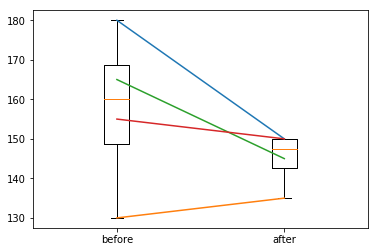

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot([xb, xa], positions=[0,1], labels=["before", "after"])
for i in range(len(xb)):
    plt.plot(["before", "after"],[xb[i], xa[i]])

plt.show()